<a href="https://colab.research.google.com/github/Krzesimir13/DataQuest/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-Nearest Neighbours alghoritm

##Import of libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

##Upload and view on dataset

In [2]:
banking_raw = pd.read_csv('subscription_prediction.csv')
banking_df = banking_raw.copy()

In [3]:
banking_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,39,management,single,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
banking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10122 entries, 0 to 10121
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             10122 non-null  int64  
 1   job             10122 non-null  object 
 2   marital         10122 non-null  object 
 3   education       10122 non-null  object 
 4   default         10122 non-null  object 
 5   housing         10122 non-null  object 
 6   loan            10122 non-null  object 
 7   contact         10122 non-null  object 
 8   month           10122 non-null  object 
 9   day_of_week     10122 non-null  object 
 10  duration        10122 non-null  int64  
 11  campaign        10122 non-null  int64  
 12  pdays           10122 non-null  int64  
 13  previous        10122 non-null  int64  
 14  poutcome        10122 non-null  object 
 15  emp.var.rate    10122 non-null  float64
 16  cons.price.idx  10122 non-null  float64
 17  cons.conf.idx   10122 non-null 

In [5]:
banking_df.describe(include='number')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,10122.000000,10122.000000,10122.000000,10122.000000,10122.000000,10122.000000,10122.000000,10122.000000,10122.000000,10122.000000
mean,40.313673,373.414049,2.369789,896.476882,0.297471,-0.432671,93.492407,-40.250573,3.035134,5138.838975
std,11.855014,353.277755,2.472392,302.175859,0.680535,1.714657,0.628615,5.271326,1.884191,85.859595
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,140.000000,1.000000,999.000000,0.000000,-1.800000,92.963000,-42.700000,1.252000,5076.200000
50%,38.000000,252.000000,2.000000,999.000000,0.000000,-0.100000,93.444000,-41.800000,4.076000,5191.000000
75%,48.000000,498.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.959000,5228.100000
max,98.000000,4199.000000,42.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
banking_df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


Text(0.5, 1.0, 'Target distribution')

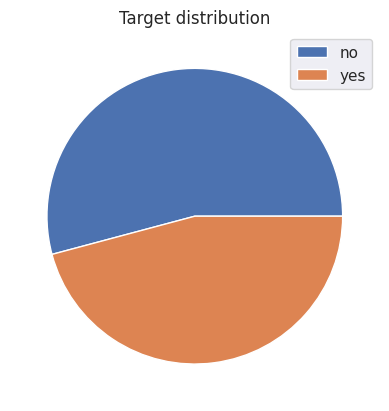

In [7]:
y = banking_df['y'].value_counts()

sns.set_theme()

plt.pie(y)
plt.legend(y.index)
plt.title('Target distribution')

In [8]:
banking_df['y'] = banking_df['y'].map({'yes' : 1, 'no' : 0})

##1. Making the KNN alghoritm

###Preparing the dataset

In [ ]:
banking_df['y'] = banking_df['y'].map({'yes' : 1, 'no' : 0})

In [ ]:
train_df = banking_df.sample(frac=0.85, random_state=417)
test_df = banking_df.drop(train_df.index)

In [ ]:
train_label = train_df['y'].value_counts()
test_label = train_df['y'].value_counts()

fig, axes = plt.subplots(1, 2)

axes[0].pie(train_label.values, autopct='%1.1f%%')
axes[0].set_title('Train label distribution')

axes[1].pie(test_label.values, autopct='%1.1f%%')
axes[1].set_title('Test label distribution')

fig.legend(train_label.index, loc='center right')

plt.show()

In [ ]:
X_train = train_df.drop('y', axis=1)
y_train = train_df['y']
X_test = test_df.drop('y', axis=1)
y_test = test_df['y']

###KNN alghoritm and tests

In [ ]:
knn('age', X_test.iloc[108], 3)

In [ ]:
y_test.iloc[108]

In [ ]:
y_pred_age = X_test.apply(lambda x: knn('age', x, 3), axis=1)

In [ ]:
accuracy_age = (y_pred_age == y_test).sum() / len(y_pred_age)
accuracy_age

In [ ]:
(y_pred_age == y_test).value_counts(normalize=True)[True]

In [ ]:
y_pred_campaign = X_test.apply(lambda x: knn('campaign', x, 3), axis=1)

In [ ]:
accuracy_campaign = (y_pred_campaign == y_test).sum() / len(y_pred_campaign)
accuracy_campaign

In [ ]:
banking_df_copy = banking_raw.copy()

In [ ]:
pd.get_dummies(data=banking_df_copy, columns=['marital'], drop_first=True)

In [ ]:
knn(["age", "campaign", "marital_married", "marital_single"], X_test_c.iloc[108], 3)

In [ ]:
y_pred = X_test_c.apply(lambda x: knn(["age", "campaign", "marital_married", "marital_single"], x, 3), axis=1)

In [ ]:
(y_pred == y_test).value_counts(normalize=True)[True]

In [ ]:
X_test['age'].dtype

In [ ]:
def knn(features, row, k):
  distance = (((X_train_c[features] - row[features])**2).sum(axis=1)**0.5).astype(float)
  neighbours = distance.nsmallest(k).index
  return y_train[neighbours].mode()[0]

In [ ]:
X_train_c = X_train.copy()
X_test_c = X_test.copy()

In [ ]:
X_train_c = pd.get_dummies(data=X_train_c, columns=['marital'],
                           drop_first=True, dtype=int)
X_test_c = pd.get_dummies(data=X_test_c, columns=['marital'],
                          drop_first=True, dtype=int)

In [ ]:
X_train_c[['age', 'campaign']] = (
    X_train[['age', 'campaign']] - X_train[['age', 'campaign']].min()) \
/ (X_train[['age', 'campaign']].max() - X_train[['age', 'campaign']].min())

X_test_c[['age', 'campaign']] = (
    X_test[['age', 'campaign']] - X_train[['age', 'campaign']].min()) \
/ (X_train[['age', 'campaign']].max() - X_train[['age', 'campaign']].min())

In [ ]:
y_pred = X_test_c.apply(lambda x: knn(["age", "campaign", "marital_married", "marital_single"], x, 3), axis=1)

In [ ]:
(y_pred == y_test).value_counts(normalize=True)[True]

##2. KNN alghoritm from Scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split

X = banking_df.drop('y', axis=1)
y = banking_df['y']

In [ ]:
X = pd.get_dummies(
    X, columns=['default', 'marital'], drop_first=True,
    )

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=417
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=0.25, random_state=417
)

In [ ]:
X_train.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(
    X_train[['age', 'duration', 'default_unknown', 'marital_married',
             'marital_single', 'marital_unknown']]
    )

X_val_scaled = scaler.transform(
    X_val[['age', 'duration', 'default_unknown', 'marital_married',
             'marital_single', 'marital_unknown']]
    )

X_test_scaled = scaler.transform(
    X_test[['age', 'duration', 'default_unknown', 'marital_married',
             'marital_single', 'marital_unknown']]
    )

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = KNeighborsClassifier(n_neighbors=1)
n_neighbors.fit(X_train_scaled, y_train)

In [ ]:
n_neighbors.score(X_val_scaled, y_val)

In [ ]:
knn_2 = KNeighborsClassifier(n_neighbors=60)
knn_2.fit(X_train_scaled, y_train)

In [ ]:
knn_2.score(X_test_scaled, y_test)

##3. Manual hyperparameter optimisation

In [ ]:
banking_df.info()

In [9]:
obj_cols = banking_df.select_dtypes(include=['object']).columns.tolist()
obj_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [10]:
banking_df = pd.get_dummies(banking_df, columns=obj_cols, drop_first=True)

In [11]:
correlations = banking_df.corr()

top_5_features = correlations['y'].abs().sort_values(ascending=False)[1:6].index
top_5_features

Index(['nr.employed', 'duration', 'euribor3m', 'emp.var.rate', 'pdays'], dtype='object')

In [12]:
from sklearn.model_selection import train_test_split

X = banking_df[top_5_features]
y = banking_df['y']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=417
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=0.25, random_state=417
)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_val_scaled = scaler.transform(X_val)

X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

accuracies = dict()
for i in range(11, 16):
  model = KNeighborsClassifier(n_neighbors=i, weights='distance', p=5)
  model.fit(X_train_scaled, y_train)
  accuracy = model.score(X_val_scaled, y_val)
  accuracies[i] = accuracy

In [ ]:
accuracies

##4. Hyperparameter optimisation by grid search

In [ ]:
X.columns

In [14]:
from sklearn.preprocessing import MinMaxScaler


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=417
)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


grid_params = {'n_neighbors' : list(range(1, 10)),
               'metric' : ['minkowski', 'manhattan']}

model = KNeighborsClassifier()

grid = GridSearchCV(estimator=model, param_grid=grid_params, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

In [17]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 9}

In [18]:
grid.best_score_

np.float64(0.8771145120825995)

In [19]:
grid.best_estimator_.score(X_test_scaled, y_test)

0.8701234567901235